# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

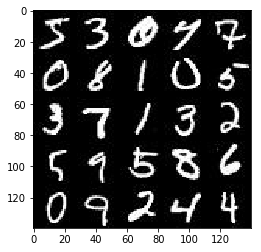

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

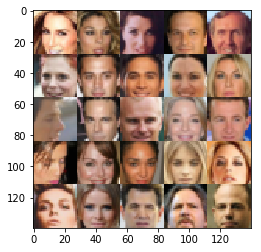

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

C:\Users\dtila\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.5.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    #Real input images placeholder
    real_input_images = tf.placeholder(tf.float32, shape=(None,image_width, image_height, image_channels), name='real_input')
    
    #Z input placeholder
    z_input = tf.placeholder(tf.float32, shape=(None, z_dim), name='input_z')
    
    #Learning rate placeholder
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    return real_input_images, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [15]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    alpha=0.1
    
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input image
        
        # First CNN Layer
        cnn_layer_1 = tf.layers.conv2d(images, filters=64, kernel_size=5, strides=2, padding='SAME', kernel_initializer = tf.contrib.layers.xavier_initializer())
        L_relu_1 = tf.maximum(cnn_layer_1*alpha, cnn_layer_1) 
        
        # Second CNN Layer
        cnn_layer_2 = tf.layers.conv2d(L_relu_1, filters=128, kernel_size=5, strides=2, padding='SAME', kernel_initializer = tf.contrib.layers.xavier_initializer())
        bn_2 = tf.layers.batch_normalization(cnn_layer_2, training=True)
        L_relu_2 = tf.maximum(bn_2*alpha, bn_2)
        #TODO - Utilize dropout layer here if necessary

        # Third CNN Layer
        cnn_layer_3 = tf.layers.conv2d(L_relu_2, filters=256, kernel_size=5, strides=2, padding='SAME', kernel_initializer = tf.contrib.layers.xavier_initializer())
        bn_3 = tf.layers.batch_normalization(cnn_layer_3, training=True)
        L_relu_3 = tf.maximum(bn_3*alpha, bn_3)
        #TODO - Utilize dropout layer here if necessary
        
        # Output of discriminator
        flaten_layer = tf.reshape(L_relu_3, (-1, 4*4*256))
        logits = tf.layers.dense(flaten_layer, 1)
        output = tf.sigmoid(logits)
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [16]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.1
    with tf.variable_scope('generator', reuse=not is_train):       
        
        # Dense layer
        dense_layer = tf.layers.dense(inputs=z, units=2*2*512)
        depth_increased_layer = tf.reshape(dense_layer, (-1, 2, 2, 512))
        bn_1 = tf.layers.batch_normalization(depth_increased_layer, training=is_train)
        rel_1 = tf.maximum(bn_1*alpha, bn_1)
        #TODO - Utilize hidden layer here if necessary
        
        # Decon layer
        decon_layer_1 = tf.layers.conv2d_transpose(rel_1, 256, 5, 2, 'valid')
        bn_2 = tf.layers.batch_normalization(decon_layer_1, training=is_train)
        rel_2 = tf.maximum(bn_2*alpha, bn_2)
        #TODO - Utilize hidden layer here if necessary
    
        # Decon Layer
        decon_layer_2 = tf.layers.conv2d_transpose(rel_2, 128, 5, 2, 'same')
        bn_3 = tf.layers.batch_normalization(decon_layer_2, training=is_train)
        rel_3 = tf.maximum(bn_3*alpha, bn_3)
        #TODO - Utilize hidden layer here if necessary
    
        # Decon Layer
        logits = tf.layers.conv2d_transpose(rel_3, out_channel_dim, 5, 2, 'same')
        output = tf.tanh(logits)
    
        return output



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [17]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function 
    
    #Generator
    g_model = generator(input_z, out_channel_dim, True)
    
    #Real image
    d_model_real, d_logits_real = discriminator(input_real)
    
    #Fake image
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    #Discriminator loss - Real Images
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                                         labels=tf.ones_like(d_model_real)*0.9)) 
    #Discriminator loss - Fake Images
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                                         labels=tf.zeros_like(d_model_fake)))
    #Generator loss - Fake Images
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                                     labels=tf.ones_like(d_model_fake)))
    #Total discriminatorloss
    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [18]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    #All the trainable variables
    trainable_variables = tf.trainable_variables()
    
    #All discriminator variables
    d_variables = [var for var in trainable_variables if var.name.startswith('discriminator')]
    
    #All generator variables
    g_variables = [var for var in trainable_variables if var.name.startswith('generator')]
    
    #Discriminator train optimizer
    d_train_optimizer = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_variables)
    
    #Optimizer update
    update_optimizer = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    
    # Generator update
    g_updates = [opt for opt in update_optimizer if opt.name.startswith('generator')]
    with tf.control_dependencies(g_updates):
        g_train_optimizer = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_variables)
        
    
    return d_train_optimizer, g_train_optimizer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [20]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    #Input images
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim) #width, height and channels(depth)
    
    #Discriminator and generator loss
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])

    #Discriminator and generator optimizer
    d_train_optimizer, g_train_optimizer = model_opt(d_loss, g_loss, lr, beta1)
    
    steps = 0
    print_loss_count = 10
    show_output_count = 100
    n_images = 30
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                batch_images *= 2.0
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Train
                _ = sess.run(d_train_optimizer, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_train_optimizer, feed_dict={input_z: batch_z, lr: learning_rate})
                
                # Printing
                if steps % print_loss_count == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{};".format(epoch_i + 1, epochs),
                          "Discriminator Loss: {:.4f};".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_output_count == 0:
                    show_generator_output(sess, n_images, input_z, data_shape[3], data_image_mode)        
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/4; Discriminator Loss: 0.6084; Generator Loss: 3.2129
Epoch 1/4; Discriminator Loss: 0.4505; Generator Loss: 4.1280
Epoch 1/4; Discriminator Loss: 3.8531; Generator Loss: 0.2472
Epoch 1/4; Discriminator Loss: 1.5767; Generator Loss: 1.3098
Epoch 1/4; Discriminator Loss: 0.3879; Generator Loss: 3.7829
Epoch 1/4; Discriminator Loss: 0.7760; Generator Loss: 1.5062
Epoch 1/4; Discriminator Loss: 0.7473; Generator Loss: 3.3352
Epoch 1/4; Discriminator Loss: 0.8370; Generator Loss: 1.7854
Epoch 1/4; Discriminator Loss: 0.4708; Generator Loss: 2.9811
Epoch 1/4; Discriminator Loss: 1.8396; Generator Loss: 11.9199


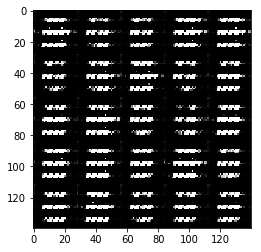

Epoch 1/4; Discriminator Loss: 1.7005; Generator Loss: 6.0043
Epoch 1/4; Discriminator Loss: 2.9354; Generator Loss: 0.1062
Epoch 1/4; Discriminator Loss: 0.6651; Generator Loss: 2.2123
Epoch 1/4; Discriminator Loss: 0.9227; Generator Loss: 4.0311
Epoch 1/4; Discriminator Loss: 0.8573; Generator Loss: 3.5123
Epoch 1/4; Discriminator Loss: 0.7096; Generator Loss: 1.6401
Epoch 1/4; Discriminator Loss: 0.5213; Generator Loss: 2.7366
Epoch 1/4; Discriminator Loss: 0.5908; Generator Loss: 3.6152
Epoch 1/4; Discriminator Loss: 0.6064; Generator Loss: 2.3194
Epoch 1/4; Discriminator Loss: 0.8615; Generator Loss: 3.9156


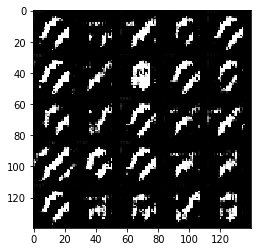

Epoch 1/4; Discriminator Loss: 0.6514; Generator Loss: 2.1506
Epoch 1/4; Discriminator Loss: 0.6395; Generator Loss: 1.8998
Epoch 1/4; Discriminator Loss: 0.5339; Generator Loss: 3.3942
Epoch 1/4; Discriminator Loss: 0.5993; Generator Loss: 2.0080
Epoch 1/4; Discriminator Loss: 0.7218; Generator Loss: 4.5951
Epoch 1/4; Discriminator Loss: 0.6128; Generator Loss: 3.5653
Epoch 1/4; Discriminator Loss: 0.5275; Generator Loss: 2.7098
Epoch 1/4; Discriminator Loss: 0.6793; Generator Loss: 4.0417
Epoch 1/4; Discriminator Loss: 3.2268; Generator Loss: 0.1132
Epoch 1/4; Discriminator Loss: 1.0167; Generator Loss: 0.8863


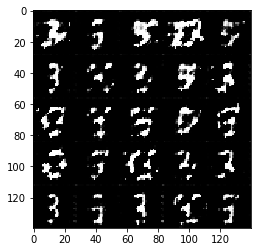

Epoch 1/4; Discriminator Loss: 1.7293; Generator Loss: 3.8515
Epoch 1/4; Discriminator Loss: 1.2397; Generator Loss: 4.8691
Epoch 1/4; Discriminator Loss: 1.1688; Generator Loss: 0.7566
Epoch 1/4; Discriminator Loss: 0.8093; Generator Loss: 1.7320
Epoch 1/4; Discriminator Loss: 0.7398; Generator Loss: 2.0889
Epoch 1/4; Discriminator Loss: 1.0562; Generator Loss: 1.1099
Epoch 1/4; Discriminator Loss: 1.4097; Generator Loss: 2.9556
Epoch 1/4; Discriminator Loss: 1.8867; Generator Loss: 0.5635
Epoch 1/4; Discriminator Loss: 1.2916; Generator Loss: 0.7453
Epoch 1/4; Discriminator Loss: 0.9235; Generator Loss: 1.9989


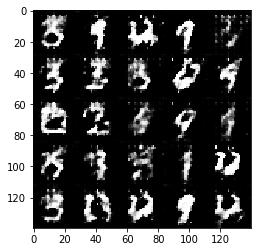

Epoch 1/4; Discriminator Loss: 1.2707; Generator Loss: 0.6909
Epoch 1/4; Discriminator Loss: 1.3955; Generator Loss: 0.6140
Epoch 1/4; Discriminator Loss: 1.0763; Generator Loss: 2.2434
Epoch 1/4; Discriminator Loss: 1.2329; Generator Loss: 0.7706
Epoch 1/4; Discriminator Loss: 0.9899; Generator Loss: 1.2590
Epoch 1/4; Discriminator Loss: 0.7830; Generator Loss: 1.9883
Epoch 2/4; Discriminator Loss: 1.0038; Generator Loss: 1.0376
Epoch 2/4; Discriminator Loss: 0.7953; Generator Loss: 1.6286
Epoch 2/4; Discriminator Loss: 1.4483; Generator Loss: 0.5588
Epoch 2/4; Discriminator Loss: 1.7998; Generator Loss: 3.5732


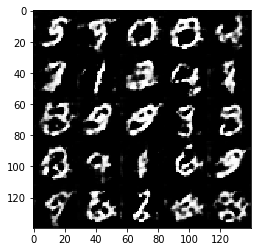

Epoch 2/4; Discriminator Loss: 0.8483; Generator Loss: 1.6952
Epoch 2/4; Discriminator Loss: 1.4786; Generator Loss: 0.5585
Epoch 2/4; Discriminator Loss: 0.9487; Generator Loss: 2.6077
Epoch 2/4; Discriminator Loss: 0.9087; Generator Loss: 1.2979
Epoch 2/4; Discriminator Loss: 1.0673; Generator Loss: 1.0367
Epoch 2/4; Discriminator Loss: 0.9818; Generator Loss: 1.8645
Epoch 2/4; Discriminator Loss: 0.9984; Generator Loss: 1.1257
Epoch 2/4; Discriminator Loss: 1.1705; Generator Loss: 1.9135
Epoch 2/4; Discriminator Loss: 1.9065; Generator Loss: 0.3628
Epoch 2/4; Discriminator Loss: 0.9758; Generator Loss: 1.1126


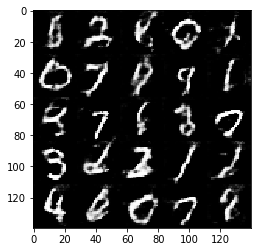

Epoch 2/4; Discriminator Loss: 0.9628; Generator Loss: 1.2322
Epoch 2/4; Discriminator Loss: 1.1799; Generator Loss: 0.9126
Epoch 2/4; Discriminator Loss: 1.0235; Generator Loss: 1.2726
Epoch 2/4; Discriminator Loss: 0.9004; Generator Loss: 1.2540
Epoch 2/4; Discriminator Loss: 1.5081; Generator Loss: 3.0952
Epoch 2/4; Discriminator Loss: 1.2532; Generator Loss: 0.7042
Epoch 2/4; Discriminator Loss: 1.3634; Generator Loss: 2.3225
Epoch 2/4; Discriminator Loss: 1.3066; Generator Loss: 1.8098
Epoch 2/4; Discriminator Loss: 0.8473; Generator Loss: 1.5010
Epoch 2/4; Discriminator Loss: 1.0206; Generator Loss: 1.5828


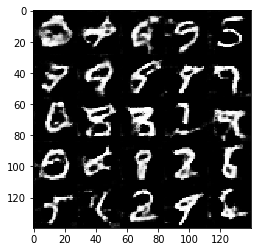

Epoch 2/4; Discriminator Loss: 0.8938; Generator Loss: 1.3068
Epoch 2/4; Discriminator Loss: 1.2396; Generator Loss: 2.0275
Epoch 2/4; Discriminator Loss: 1.0616; Generator Loss: 1.0895
Epoch 2/4; Discriminator Loss: 1.0061; Generator Loss: 1.2226
Epoch 2/4; Discriminator Loss: 0.9800; Generator Loss: 1.2653
Epoch 2/4; Discriminator Loss: 1.3951; Generator Loss: 0.5665
Epoch 2/4; Discriminator Loss: 1.1762; Generator Loss: 0.8908
Epoch 2/4; Discriminator Loss: 1.2407; Generator Loss: 0.7814
Epoch 2/4; Discriminator Loss: 1.0468; Generator Loss: 1.2761
Epoch 2/4; Discriminator Loss: 1.0821; Generator Loss: 1.2981


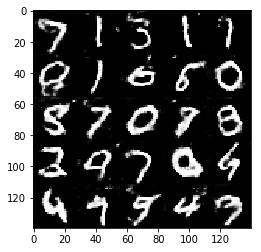

Epoch 2/4; Discriminator Loss: 0.9946; Generator Loss: 1.1766
Epoch 2/4; Discriminator Loss: 1.2434; Generator Loss: 0.6978
Epoch 2/4; Discriminator Loss: 1.3061; Generator Loss: 1.1292
Epoch 2/4; Discriminator Loss: 1.1760; Generator Loss: 1.0796
Epoch 2/4; Discriminator Loss: 1.2166; Generator Loss: 0.7726
Epoch 2/4; Discriminator Loss: 1.2476; Generator Loss: 0.9266
Epoch 2/4; Discriminator Loss: 1.1764; Generator Loss: 1.3638
Epoch 2/4; Discriminator Loss: 1.0736; Generator Loss: 1.4640
Epoch 2/4; Discriminator Loss: 1.0324; Generator Loss: 1.1375
Epoch 2/4; Discriminator Loss: 1.3221; Generator Loss: 1.9825


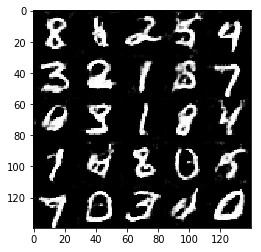

Epoch 2/4; Discriminator Loss: 1.0967; Generator Loss: 0.9112
Epoch 2/4; Discriminator Loss: 1.0799; Generator Loss: 1.2337
Epoch 2/4; Discriminator Loss: 0.9352; Generator Loss: 1.3621
Epoch 3/4; Discriminator Loss: 1.2485; Generator Loss: 1.3764
Epoch 3/4; Discriminator Loss: 1.1455; Generator Loss: 1.3296
Epoch 3/4; Discriminator Loss: 1.1916; Generator Loss: 1.5658
Epoch 3/4; Discriminator Loss: 1.1313; Generator Loss: 0.8433
Epoch 3/4; Discriminator Loss: 1.0579; Generator Loss: 1.1543
Epoch 3/4; Discriminator Loss: 1.2370; Generator Loss: 1.0471
Epoch 3/4; Discriminator Loss: 1.1169; Generator Loss: 1.0702


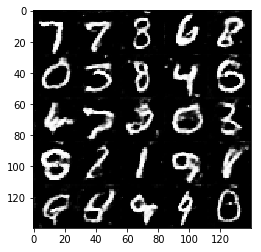

Epoch 3/4; Discriminator Loss: 1.2041; Generator Loss: 0.7463
Epoch 3/4; Discriminator Loss: 1.3007; Generator Loss: 0.7820
Epoch 3/4; Discriminator Loss: 1.1300; Generator Loss: 0.8056
Epoch 3/4; Discriminator Loss: 1.0850; Generator Loss: 1.8363
Epoch 3/4; Discriminator Loss: 1.2376; Generator Loss: 0.7304
Epoch 3/4; Discriminator Loss: 1.4054; Generator Loss: 2.3717
Epoch 3/4; Discriminator Loss: 1.1768; Generator Loss: 1.4523
Epoch 3/4; Discriminator Loss: 1.2968; Generator Loss: 0.6402
Epoch 3/4; Discriminator Loss: 1.4009; Generator Loss: 0.5757
Epoch 3/4; Discriminator Loss: 1.0568; Generator Loss: 1.9797


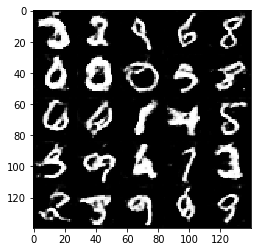

Epoch 3/4; Discriminator Loss: 1.0222; Generator Loss: 1.3806
Epoch 3/4; Discriminator Loss: 0.9041; Generator Loss: 1.0654
Epoch 3/4; Discriminator Loss: 1.2515; Generator Loss: 1.0038
Epoch 3/4; Discriminator Loss: 1.0384; Generator Loss: 1.0593
Epoch 3/4; Discriminator Loss: 1.2677; Generator Loss: 0.6860
Epoch 3/4; Discriminator Loss: 1.2280; Generator Loss: 0.8434
Epoch 3/4; Discriminator Loss: 1.2751; Generator Loss: 1.1680
Epoch 3/4; Discriminator Loss: 1.0449; Generator Loss: 1.0997
Epoch 3/4; Discriminator Loss: 1.8401; Generator Loss: 0.3242
Epoch 3/4; Discriminator Loss: 1.1540; Generator Loss: 0.9623


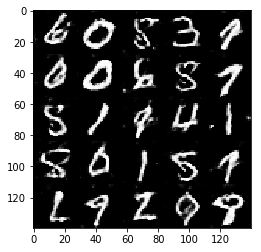

Epoch 3/4; Discriminator Loss: 1.2443; Generator Loss: 0.9605
Epoch 3/4; Discriminator Loss: 1.2998; Generator Loss: 0.6513
Epoch 3/4; Discriminator Loss: 1.1640; Generator Loss: 1.7460
Epoch 3/4; Discriminator Loss: 1.3421; Generator Loss: 0.8245
Epoch 3/4; Discriminator Loss: 1.1657; Generator Loss: 1.1324
Epoch 3/4; Discriminator Loss: 1.0794; Generator Loss: 1.1807
Epoch 3/4; Discriminator Loss: 1.6486; Generator Loss: 2.2662
Epoch 3/4; Discriminator Loss: 1.1413; Generator Loss: 1.0956
Epoch 3/4; Discriminator Loss: 1.2645; Generator Loss: 0.7116
Epoch 3/4; Discriminator Loss: 1.1242; Generator Loss: 0.8670


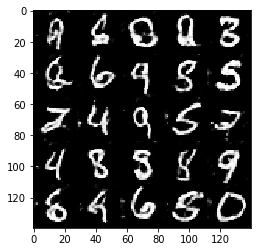

Epoch 3/4; Discriminator Loss: 1.1026; Generator Loss: 1.6647
Epoch 3/4; Discriminator Loss: 1.2631; Generator Loss: 0.6620
Epoch 3/4; Discriminator Loss: 1.0645; Generator Loss: 2.4006
Epoch 3/4; Discriminator Loss: 1.1866; Generator Loss: 0.7954
Epoch 3/4; Discriminator Loss: 1.1733; Generator Loss: 0.9779
Epoch 3/4; Discriminator Loss: 1.0661; Generator Loss: 1.1645
Epoch 3/4; Discriminator Loss: 0.8613; Generator Loss: 1.4522
Epoch 3/4; Discriminator Loss: 1.0825; Generator Loss: 0.9775
Epoch 3/4; Discriminator Loss: 1.1704; Generator Loss: 0.8543
Epoch 3/4; Discriminator Loss: 1.0725; Generator Loss: 1.4223


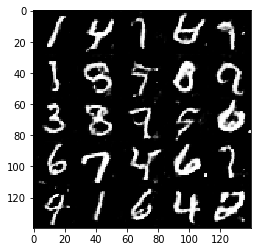

Epoch 4/4; Discriminator Loss: 1.1558; Generator Loss: 1.7653
Epoch 4/4; Discriminator Loss: 1.1586; Generator Loss: 1.0814
Epoch 4/4; Discriminator Loss: 1.7790; Generator Loss: 0.3492
Epoch 4/4; Discriminator Loss: 1.0640; Generator Loss: 1.1476
Epoch 4/4; Discriminator Loss: 1.3848; Generator Loss: 0.5636
Epoch 4/4; Discriminator Loss: 1.2601; Generator Loss: 0.7362
Epoch 4/4; Discriminator Loss: 0.8094; Generator Loss: 1.4371
Epoch 4/4; Discriminator Loss: 1.1163; Generator Loss: 1.1485
Epoch 4/4; Discriminator Loss: 1.4641; Generator Loss: 0.5214
Epoch 4/4; Discriminator Loss: 1.3854; Generator Loss: 0.6065


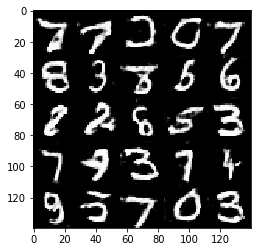

Epoch 4/4; Discriminator Loss: 1.0480; Generator Loss: 0.9611
Epoch 4/4; Discriminator Loss: 1.0200; Generator Loss: 1.2933
Epoch 4/4; Discriminator Loss: 1.5371; Generator Loss: 0.4748
Epoch 4/4; Discriminator Loss: 1.1042; Generator Loss: 0.9746
Epoch 4/4; Discriminator Loss: 1.7006; Generator Loss: 0.4065
Epoch 4/4; Discriminator Loss: 1.1694; Generator Loss: 0.7594
Epoch 4/4; Discriminator Loss: 1.2231; Generator Loss: 0.7603
Epoch 4/4; Discriminator Loss: 1.0930; Generator Loss: 1.1254
Epoch 4/4; Discriminator Loss: 0.7136; Generator Loss: 1.8358
Epoch 4/4; Discriminator Loss: 0.7810; Generator Loss: 1.3509


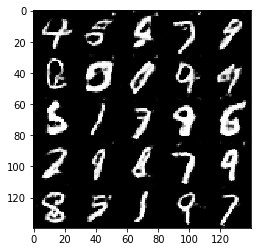

Epoch 4/4; Discriminator Loss: 1.2306; Generator Loss: 0.9123
Epoch 4/4; Discriminator Loss: 1.1497; Generator Loss: 0.8223
Epoch 4/4; Discriminator Loss: 1.6460; Generator Loss: 0.4865
Epoch 4/4; Discriminator Loss: 1.1051; Generator Loss: 1.4781
Epoch 4/4; Discriminator Loss: 1.1602; Generator Loss: 0.8329
Epoch 4/4; Discriminator Loss: 1.9962; Generator Loss: 0.2939
Epoch 4/4; Discriminator Loss: 1.0469; Generator Loss: 1.1076
Epoch 4/4; Discriminator Loss: 1.2611; Generator Loss: 0.6665
Epoch 4/4; Discriminator Loss: 1.3369; Generator Loss: 0.6988
Epoch 4/4; Discriminator Loss: 0.9193; Generator Loss: 1.1380


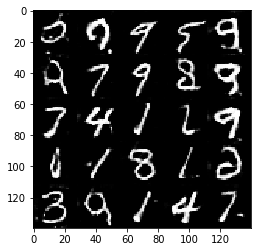

Epoch 4/4; Discriminator Loss: 1.0045; Generator Loss: 1.2873
Epoch 4/4; Discriminator Loss: 1.1727; Generator Loss: 0.7833
Epoch 4/4; Discriminator Loss: 1.6426; Generator Loss: 2.7595
Epoch 4/4; Discriminator Loss: 1.1250; Generator Loss: 1.0100
Epoch 4/4; Discriminator Loss: 1.3054; Generator Loss: 0.6193
Epoch 4/4; Discriminator Loss: 0.9113; Generator Loss: 1.8600
Epoch 4/4; Discriminator Loss: 1.2272; Generator Loss: 0.7645
Epoch 4/4; Discriminator Loss: 0.9714; Generator Loss: 1.1079
Epoch 4/4; Discriminator Loss: 1.2551; Generator Loss: 0.7132
Epoch 4/4; Discriminator Loss: 1.0959; Generator Loss: 0.9650


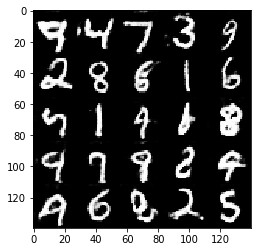

Epoch 4/4; Discriminator Loss: 1.0986; Generator Loss: 0.8868
Epoch 4/4; Discriminator Loss: 1.3893; Generator Loss: 0.5745
Epoch 4/4; Discriminator Loss: 1.1731; Generator Loss: 1.5380
Epoch 4/4; Discriminator Loss: 1.1893; Generator Loss: 1.2468
Epoch 4/4; Discriminator Loss: 0.8997; Generator Loss: 1.1664
Epoch 4/4; Discriminator Loss: 1.5722; Generator Loss: 0.5183
Epoch 4/4; Discriminator Loss: 1.0498; Generator Loss: 0.9955


In [21]:
batch_size = 128
z_dim = 100
learning_rate = 0.004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 4

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1; Discriminator Loss: 3.7844; Generator Loss: 18.2145
Epoch 1/1; Discriminator Loss: 1.1295; Generator Loss: 9.6224
Epoch 1/1; Discriminator Loss: 0.6390; Generator Loss: 9.0647
Epoch 1/1; Discriminator Loss: 0.6370; Generator Loss: 8.5674
Epoch 1/1; Discriminator Loss: 1.0651; Generator Loss: 7.6624
Epoch 1/1; Discriminator Loss: 0.6803; Generator Loss: 2.7894
Epoch 1/1; Discriminator Loss: 0.9214; Generator Loss: 1.1815
Epoch 1/1; Discriminator Loss: 0.7578; Generator Loss: 1.7433
Epoch 1/1; Discriminator Loss: 0.7852; Generator Loss: 1.2621
Epoch 1/1; Discriminator Loss: 1.3426; Generator Loss: 0.5945


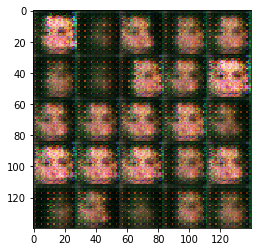

Epoch 1/1; Discriminator Loss: 1.1414; Generator Loss: 0.7917
Epoch 1/1; Discriminator Loss: 1.4503; Generator Loss: 0.5458
Epoch 1/1; Discriminator Loss: 1.0052; Generator Loss: 1.0981
Epoch 1/1; Discriminator Loss: 0.8022; Generator Loss: 1.2406
Epoch 1/1; Discriminator Loss: 2.1331; Generator Loss: 6.4231
Epoch 1/1; Discriminator Loss: 1.1225; Generator Loss: 0.7971
Epoch 1/1; Discriminator Loss: 0.9590; Generator Loss: 1.4382
Epoch 1/1; Discriminator Loss: 1.0663; Generator Loss: 1.0882
Epoch 1/1; Discriminator Loss: 1.5953; Generator Loss: 0.5609
Epoch 1/1; Discriminator Loss: 1.0329; Generator Loss: 2.0638


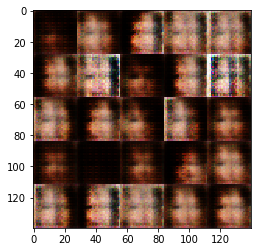

Epoch 1/1; Discriminator Loss: 0.7408; Generator Loss: 3.1880
Epoch 1/1; Discriminator Loss: 0.8396; Generator Loss: 1.7883
Epoch 1/1; Discriminator Loss: 2.0998; Generator Loss: 2.7954
Epoch 1/1; Discriminator Loss: 1.1769; Generator Loss: 0.9746
Epoch 1/1; Discriminator Loss: 0.9457; Generator Loss: 1.6557
Epoch 1/1; Discriminator Loss: 0.8641; Generator Loss: 2.0653
Epoch 1/1; Discriminator Loss: 0.9150; Generator Loss: 1.2482
Epoch 1/1; Discriminator Loss: 1.2694; Generator Loss: 0.8979
Epoch 1/1; Discriminator Loss: 1.1782; Generator Loss: 0.7405
Epoch 1/1; Discriminator Loss: 0.9614; Generator Loss: 1.8520


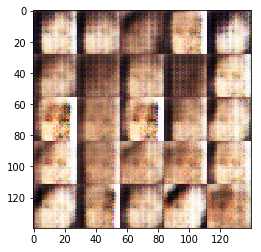

Epoch 1/1; Discriminator Loss: 1.6461; Generator Loss: 0.9255
Epoch 1/1; Discriminator Loss: 1.1571; Generator Loss: 0.8817
Epoch 1/1; Discriminator Loss: 0.9866; Generator Loss: 1.0136
Epoch 1/1; Discriminator Loss: 0.9394; Generator Loss: 1.3775
Epoch 1/1; Discriminator Loss: 1.0171; Generator Loss: 1.2788
Epoch 1/1; Discriminator Loss: 1.1705; Generator Loss: 0.8516
Epoch 1/1; Discriminator Loss: 0.8239; Generator Loss: 1.3385
Epoch 1/1; Discriminator Loss: 1.1230; Generator Loss: 0.8045
Epoch 1/1; Discriminator Loss: 0.8130; Generator Loss: 1.2599
Epoch 1/1; Discriminator Loss: 1.7266; Generator Loss: 0.3557


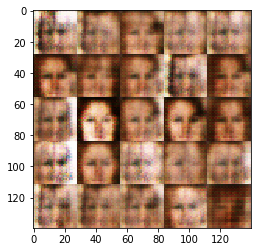

Epoch 1/1; Discriminator Loss: 0.8871; Generator Loss: 1.8799
Epoch 1/1; Discriminator Loss: 0.9967; Generator Loss: 0.9413
Epoch 1/1; Discriminator Loss: 0.9270; Generator Loss: 1.3508
Epoch 1/1; Discriminator Loss: 0.9340; Generator Loss: 1.0790
Epoch 1/1; Discriminator Loss: 1.3891; Generator Loss: 3.1420
Epoch 1/1; Discriminator Loss: 1.3181; Generator Loss: 2.9978
Epoch 1/1; Discriminator Loss: 0.9811; Generator Loss: 1.4335
Epoch 1/1; Discriminator Loss: 0.7490; Generator Loss: 1.6503
Epoch 1/1; Discriminator Loss: 1.6632; Generator Loss: 2.6091
Epoch 1/1; Discriminator Loss: 1.0849; Generator Loss: 1.6818


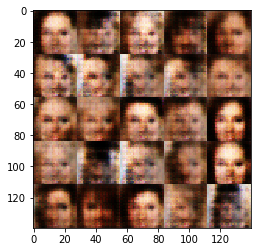

Epoch 1/1; Discriminator Loss: 1.1649; Generator Loss: 0.7548
Epoch 1/1; Discriminator Loss: 1.2603; Generator Loss: 2.6929
Epoch 1/1; Discriminator Loss: 1.4932; Generator Loss: 3.1673
Epoch 1/1; Discriminator Loss: 0.8585; Generator Loss: 1.1171
Epoch 1/1; Discriminator Loss: 1.6334; Generator Loss: 0.3929
Epoch 1/1; Discriminator Loss: 0.8564; Generator Loss: 1.2902
Epoch 1/1; Discriminator Loss: 2.1922; Generator Loss: 3.6638
Epoch 1/1; Discriminator Loss: 1.5717; Generator Loss: 3.2828
Epoch 1/1; Discriminator Loss: 1.2323; Generator Loss: 1.3440
Epoch 1/1; Discriminator Loss: 0.6648; Generator Loss: 1.7497


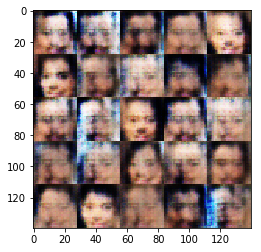

Epoch 1/1; Discriminator Loss: 1.0278; Generator Loss: 1.4415
Epoch 1/1; Discriminator Loss: 1.0362; Generator Loss: 1.6323
Epoch 1/1; Discriminator Loss: 0.9927; Generator Loss: 1.2424
Epoch 1/1; Discriminator Loss: 1.1296; Generator Loss: 1.4193
Epoch 1/1; Discriminator Loss: 0.9664; Generator Loss: 1.3142
Epoch 1/1; Discriminator Loss: 1.0418; Generator Loss: 1.6988
Epoch 1/1; Discriminator Loss: 1.0611; Generator Loss: 2.0379
Epoch 1/1; Discriminator Loss: 1.1285; Generator Loss: 1.2028
Epoch 1/1; Discriminator Loss: 1.0128; Generator Loss: 0.9159
Epoch 1/1; Discriminator Loss: 1.2508; Generator Loss: 0.6607


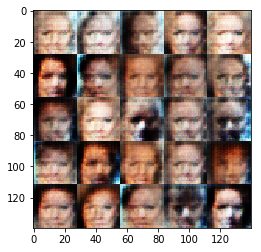

Epoch 1/1; Discriminator Loss: 0.8709; Generator Loss: 2.3198
Epoch 1/1; Discriminator Loss: 1.2270; Generator Loss: 1.0311
Epoch 1/1; Discriminator Loss: 0.9918; Generator Loss: 0.9799
Epoch 1/1; Discriminator Loss: 0.8691; Generator Loss: 1.3217
Epoch 1/1; Discriminator Loss: 1.1356; Generator Loss: 1.2269
Epoch 1/1; Discriminator Loss: 1.3019; Generator Loss: 1.4588
Epoch 1/1; Discriminator Loss: 0.8963; Generator Loss: 1.5520
Epoch 1/1; Discriminator Loss: 1.3357; Generator Loss: 0.6457
Epoch 1/1; Discriminator Loss: 1.2509; Generator Loss: 2.1513
Epoch 1/1; Discriminator Loss: 1.4229; Generator Loss: 2.7202


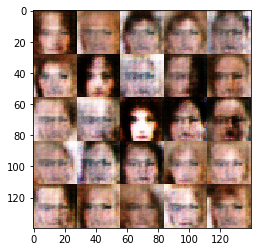

Epoch 1/1; Discriminator Loss: 0.8452; Generator Loss: 1.4919
Epoch 1/1; Discriminator Loss: 1.2542; Generator Loss: 0.6882
Epoch 1/1; Discriminator Loss: 0.9700; Generator Loss: 1.0464
Epoch 1/1; Discriminator Loss: 1.0821; Generator Loss: 1.0480
Epoch 1/1; Discriminator Loss: 1.0131; Generator Loss: 1.0355
Epoch 1/1; Discriminator Loss: 1.0069; Generator Loss: 1.2390
Epoch 1/1; Discriminator Loss: 0.8618; Generator Loss: 1.7127
Epoch 1/1; Discriminator Loss: 1.2036; Generator Loss: 0.7606
Epoch 1/1; Discriminator Loss: 1.6582; Generator Loss: 0.3971
Epoch 1/1; Discriminator Loss: 1.0710; Generator Loss: 1.2405


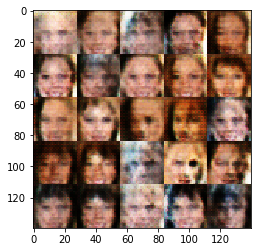

Epoch 1/1; Discriminator Loss: 1.0421; Generator Loss: 1.4617
Epoch 1/1; Discriminator Loss: 1.3186; Generator Loss: 0.5600
Epoch 1/1; Discriminator Loss: 1.2347; Generator Loss: 0.7920
Epoch 1/1; Discriminator Loss: 0.9813; Generator Loss: 1.3255
Epoch 1/1; Discriminator Loss: 1.0236; Generator Loss: 1.4743
Epoch 1/1; Discriminator Loss: 1.0364; Generator Loss: 1.0306
Epoch 1/1; Discriminator Loss: 0.9055; Generator Loss: 1.2715
Epoch 1/1; Discriminator Loss: 1.1290; Generator Loss: 0.8108
Epoch 1/1; Discriminator Loss: 0.8951; Generator Loss: 1.8411
Epoch 1/1; Discriminator Loss: 0.9086; Generator Loss: 2.1622


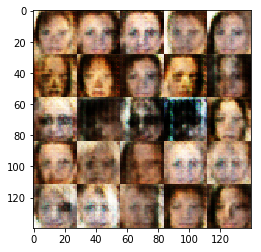

Epoch 1/1; Discriminator Loss: 0.9442; Generator Loss: 1.4140
Epoch 1/1; Discriminator Loss: 0.9781; Generator Loss: 1.0899
Epoch 1/1; Discriminator Loss: 1.2221; Generator Loss: 0.6791
Epoch 1/1; Discriminator Loss: 0.9956; Generator Loss: 1.2573
Epoch 1/1; Discriminator Loss: 0.8766; Generator Loss: 1.2761
Epoch 1/1; Discriminator Loss: 1.3532; Generator Loss: 0.5309
Epoch 1/1; Discriminator Loss: 1.1495; Generator Loss: 2.1007
Epoch 1/1; Discriminator Loss: 1.0706; Generator Loss: 1.9841
Epoch 1/1; Discriminator Loss: 0.9913; Generator Loss: 1.2539
Epoch 1/1; Discriminator Loss: 0.9821; Generator Loss: 1.1038


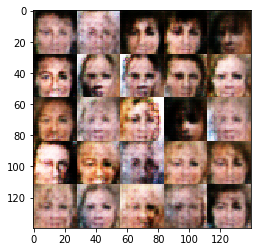

Epoch 1/1; Discriminator Loss: 1.0612; Generator Loss: 2.2402
Epoch 1/1; Discriminator Loss: 0.9080; Generator Loss: 1.0551
Epoch 1/1; Discriminator Loss: 0.7650; Generator Loss: 1.4606
Epoch 1/1; Discriminator Loss: 0.9968; Generator Loss: 1.1925
Epoch 1/1; Discriminator Loss: 0.9708; Generator Loss: 1.5823
Epoch 1/1; Discriminator Loss: 0.8716; Generator Loss: 1.7594
Epoch 1/1; Discriminator Loss: 1.0116; Generator Loss: 2.4891
Epoch 1/1; Discriminator Loss: 0.9440; Generator Loss: 1.1030
Epoch 1/1; Discriminator Loss: 0.9855; Generator Loss: 1.5876
Epoch 1/1; Discriminator Loss: 1.2370; Generator Loss: 0.6776


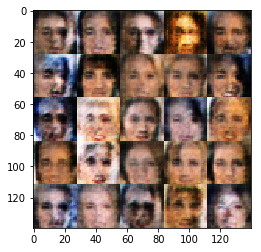

Epoch 1/1; Discriminator Loss: 0.9938; Generator Loss: 1.2075
Epoch 1/1; Discriminator Loss: 1.0361; Generator Loss: 0.9010
Epoch 1/1; Discriminator Loss: 1.0465; Generator Loss: 0.9465
Epoch 1/1; Discriminator Loss: 0.8726; Generator Loss: 1.4731
Epoch 1/1; Discriminator Loss: 0.9907; Generator Loss: 1.7059
Epoch 1/1; Discriminator Loss: 1.3061; Generator Loss: 0.6512
Epoch 1/1; Discriminator Loss: 1.3191; Generator Loss: 2.8125
Epoch 1/1; Discriminator Loss: 1.0598; Generator Loss: 0.8948
Epoch 1/1; Discriminator Loss: 0.8540; Generator Loss: 1.8847
Epoch 1/1; Discriminator Loss: 0.9059; Generator Loss: 1.6899


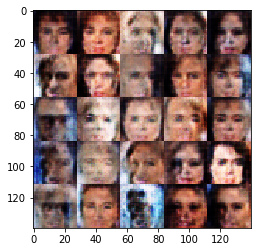

Epoch 1/1; Discriminator Loss: 1.2156; Generator Loss: 1.2790
Epoch 1/1; Discriminator Loss: 0.9932; Generator Loss: 1.5043
Epoch 1/1; Discriminator Loss: 0.7895; Generator Loss: 1.4937
Epoch 1/1; Discriminator Loss: 0.9007; Generator Loss: 1.4823
Epoch 1/1; Discriminator Loss: 0.8074; Generator Loss: 1.6039
Epoch 1/1; Discriminator Loss: 0.8452; Generator Loss: 1.4906
Epoch 1/1; Discriminator Loss: 1.0597; Generator Loss: 1.5570
Epoch 1/1; Discriminator Loss: 1.0473; Generator Loss: 2.4643
Epoch 1/1; Discriminator Loss: 1.0746; Generator Loss: 1.0488
Epoch 1/1; Discriminator Loss: 1.2651; Generator Loss: 2.3786


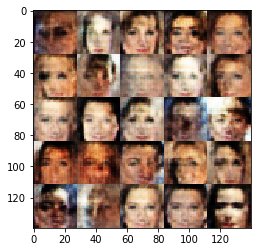

Epoch 1/1; Discriminator Loss: 0.8078; Generator Loss: 1.3547
Epoch 1/1; Discriminator Loss: 1.1655; Generator Loss: 0.8520
Epoch 1/1; Discriminator Loss: 1.2009; Generator Loss: 0.6601
Epoch 1/1; Discriminator Loss: 0.9689; Generator Loss: 1.5125
Epoch 1/1; Discriminator Loss: 0.9918; Generator Loss: 1.0149
Epoch 1/1; Discriminator Loss: 1.1108; Generator Loss: 0.7854
Epoch 1/1; Discriminator Loss: 0.9323; Generator Loss: 1.1988
Epoch 1/1; Discriminator Loss: 1.0977; Generator Loss: 0.8750
Epoch 1/1; Discriminator Loss: 0.9933; Generator Loss: 1.4680
Epoch 1/1; Discriminator Loss: 0.9498; Generator Loss: 1.1780


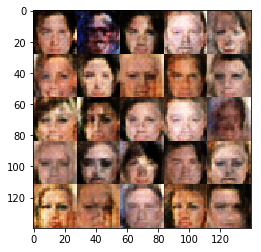

Epoch 1/1; Discriminator Loss: 1.1014; Generator Loss: 1.0948
Epoch 1/1; Discriminator Loss: 0.9815; Generator Loss: 1.3282
Epoch 1/1; Discriminator Loss: 0.9900; Generator Loss: 1.0117
Epoch 1/1; Discriminator Loss: 1.1585; Generator Loss: 0.7477
Epoch 1/1; Discriminator Loss: 1.0569; Generator Loss: 1.8240
Epoch 1/1; Discriminator Loss: 0.8265; Generator Loss: 1.5340
Epoch 1/1; Discriminator Loss: 0.7569; Generator Loss: 1.6272
Epoch 1/1; Discriminator Loss: 0.8681; Generator Loss: 1.2932
Epoch 1/1; Discriminator Loss: 0.9357; Generator Loss: 1.4354
Epoch 1/1; Discriminator Loss: 0.8791; Generator Loss: 1.3539


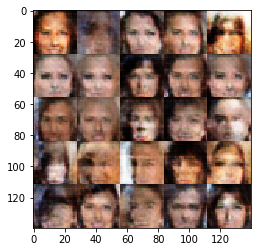

Epoch 1/1; Discriminator Loss: 1.3072; Generator Loss: 0.6054
Epoch 1/1; Discriminator Loss: 0.9868; Generator Loss: 1.0043
Epoch 1/1; Discriminator Loss: 1.1063; Generator Loss: 0.8125
Epoch 1/1; Discriminator Loss: 1.2445; Generator Loss: 0.8294
Epoch 1/1; Discriminator Loss: 1.4370; Generator Loss: 0.5348
Epoch 1/1; Discriminator Loss: 1.0231; Generator Loss: 0.9431
Epoch 1/1; Discriminator Loss: 1.1339; Generator Loss: 1.7594
Epoch 1/1; Discriminator Loss: 1.0363; Generator Loss: 0.9740
Epoch 1/1; Discriminator Loss: 0.9895; Generator Loss: 1.1802
Epoch 1/1; Discriminator Loss: 1.0630; Generator Loss: 0.9729


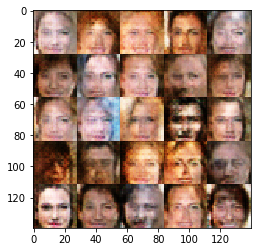

Epoch 1/1; Discriminator Loss: 1.1202; Generator Loss: 0.8400
Epoch 1/1; Discriminator Loss: 0.9853; Generator Loss: 1.2645
Epoch 1/1; Discriminator Loss: 0.9526; Generator Loss: 2.4010
Epoch 1/1; Discriminator Loss: 1.0219; Generator Loss: 0.9912
Epoch 1/1; Discriminator Loss: 1.2173; Generator Loss: 0.7627
Epoch 1/1; Discriminator Loss: 0.9558; Generator Loss: 1.7153
Epoch 1/1; Discriminator Loss: 1.2511; Generator Loss: 0.6661
Epoch 1/1; Discriminator Loss: 1.0427; Generator Loss: 0.9354
Epoch 1/1; Discriminator Loss: 1.4407; Generator Loss: 2.5813
Epoch 1/1; Discriminator Loss: 1.2482; Generator Loss: 0.6579


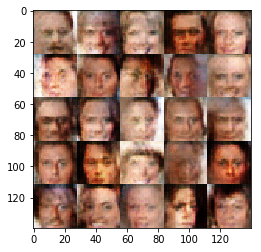

Epoch 1/1; Discriminator Loss: 1.1641; Generator Loss: 0.8163
Epoch 1/1; Discriminator Loss: 0.9500; Generator Loss: 1.7791
Epoch 1/1; Discriminator Loss: 1.0517; Generator Loss: 0.9489
Epoch 1/1; Discriminator Loss: 0.9640; Generator Loss: 1.2219
Epoch 1/1; Discriminator Loss: 1.0834; Generator Loss: 1.8443
Epoch 1/1; Discriminator Loss: 1.0644; Generator Loss: 0.9487
Epoch 1/1; Discriminator Loss: 1.1528; Generator Loss: 0.8595
Epoch 1/1; Discriminator Loss: 0.9633; Generator Loss: 1.1921
Epoch 1/1; Discriminator Loss: 0.9952; Generator Loss: 1.6000
Epoch 1/1; Discriminator Loss: 1.3746; Generator Loss: 0.5955


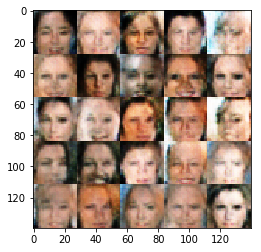

Epoch 1/1; Discriminator Loss: 1.0808; Generator Loss: 1.0537
Epoch 1/1; Discriminator Loss: 1.0250; Generator Loss: 0.9366
Epoch 1/1; Discriminator Loss: 1.1031; Generator Loss: 0.9085
Epoch 1/1; Discriminator Loss: 0.9339; Generator Loss: 1.4629
Epoch 1/1; Discriminator Loss: 1.1413; Generator Loss: 2.1206
Epoch 1/1; Discriminator Loss: 1.0357; Generator Loss: 1.0556
Epoch 1/1; Discriminator Loss: 0.8156; Generator Loss: 1.4324
Epoch 1/1; Discriminator Loss: 1.1376; Generator Loss: 0.8786
Epoch 1/1; Discriminator Loss: 0.9346; Generator Loss: 1.0425
Epoch 1/1; Discriminator Loss: 1.0518; Generator Loss: 0.9743


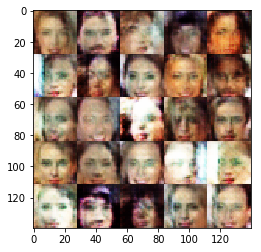

Epoch 1/1; Discriminator Loss: 0.8570; Generator Loss: 1.5072
Epoch 1/1; Discriminator Loss: 1.0887; Generator Loss: 1.0340
Epoch 1/1; Discriminator Loss: 0.8641; Generator Loss: 1.1933
Epoch 1/1; Discriminator Loss: 1.1207; Generator Loss: 0.9436
Epoch 1/1; Discriminator Loss: 1.1338; Generator Loss: 2.3059
Epoch 1/1; Discriminator Loss: 1.2064; Generator Loss: 0.6819
Epoch 1/1; Discriminator Loss: 0.9752; Generator Loss: 1.0410
Epoch 1/1; Discriminator Loss: 0.9529; Generator Loss: 1.6289
Epoch 1/1; Discriminator Loss: 1.0217; Generator Loss: 1.0990
Epoch 1/1; Discriminator Loss: 1.1644; Generator Loss: 0.7865


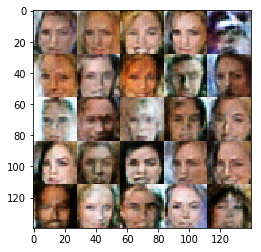

Epoch 1/1; Discriminator Loss: 1.1428; Generator Loss: 1.7827
Epoch 1/1; Discriminator Loss: 1.1663; Generator Loss: 0.8383
Epoch 1/1; Discriminator Loss: 0.9814; Generator Loss: 1.1373
Epoch 1/1; Discriminator Loss: 1.1096; Generator Loss: 0.8909
Epoch 1/1; Discriminator Loss: 1.1396; Generator Loss: 1.6250
Epoch 1/1; Discriminator Loss: 0.9046; Generator Loss: 1.1404
Epoch 1/1; Discriminator Loss: 0.9713; Generator Loss: 1.7709
Epoch 1/1; Discriminator Loss: 1.1401; Generator Loss: 1.7990
Epoch 1/1; Discriminator Loss: 1.2060; Generator Loss: 0.7070
Epoch 1/1; Discriminator Loss: 0.9893; Generator Loss: 1.9977


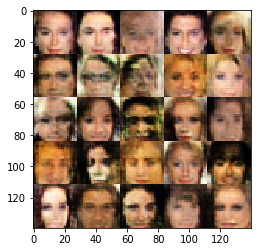

Epoch 1/1; Discriminator Loss: 0.9790; Generator Loss: 1.0789
Epoch 1/1; Discriminator Loss: 1.0051; Generator Loss: 1.1870
Epoch 1/1; Discriminator Loss: 1.1852; Generator Loss: 0.8875
Epoch 1/1; Discriminator Loss: 1.0793; Generator Loss: 0.9478
Epoch 1/1; Discriminator Loss: 1.5749; Generator Loss: 0.4089
Epoch 1/1; Discriminator Loss: 1.0305; Generator Loss: 0.8597
Epoch 1/1; Discriminator Loss: 1.3411; Generator Loss: 0.5553
Epoch 1/1; Discriminator Loss: 1.0654; Generator Loss: 1.4425
Epoch 1/1; Discriminator Loss: 1.0677; Generator Loss: 1.5435
Epoch 1/1; Discriminator Loss: 1.0053; Generator Loss: 2.1813


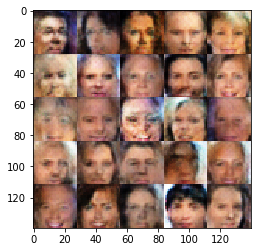

Epoch 1/1; Discriminator Loss: 1.3141; Generator Loss: 0.6303
Epoch 1/1; Discriminator Loss: 0.9959; Generator Loss: 1.2805
Epoch 1/1; Discriminator Loss: 1.2816; Generator Loss: 2.0498
Epoch 1/1; Discriminator Loss: 1.3165; Generator Loss: 0.5634
Epoch 1/1; Discriminator Loss: 1.0108; Generator Loss: 1.1751
Epoch 1/1; Discriminator Loss: 0.9487; Generator Loss: 1.1645
Epoch 1/1; Discriminator Loss: 0.9441; Generator Loss: 1.6250
Epoch 1/1; Discriminator Loss: 1.1562; Generator Loss: 1.6936
Epoch 1/1; Discriminator Loss: 1.0631; Generator Loss: 1.4657
Epoch 1/1; Discriminator Loss: 1.1091; Generator Loss: 0.9394


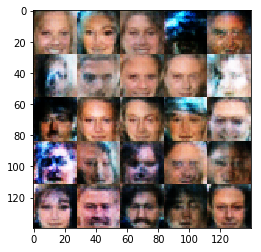

Epoch 1/1; Discriminator Loss: 1.0868; Generator Loss: 1.8594
Epoch 1/1; Discriminator Loss: 1.0360; Generator Loss: 0.9698
Epoch 1/1; Discriminator Loss: 0.9327; Generator Loss: 1.7234
Epoch 1/1; Discriminator Loss: 1.1766; Generator Loss: 0.8257
Epoch 1/1; Discriminator Loss: 1.0686; Generator Loss: 2.0051
Epoch 1/1; Discriminator Loss: 1.0303; Generator Loss: 1.5795
Epoch 1/1; Discriminator Loss: 1.0115; Generator Loss: 1.0746
Epoch 1/1; Discriminator Loss: 0.9630; Generator Loss: 1.6588
Epoch 1/1; Discriminator Loss: 0.9910; Generator Loss: 1.1349
Epoch 1/1; Discriminator Loss: 1.1290; Generator Loss: 0.7715


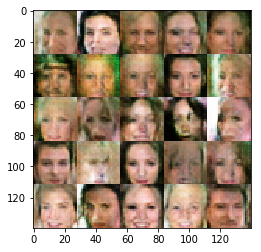

Epoch 1/1; Discriminator Loss: 0.9180; Generator Loss: 1.3166
Epoch 1/1; Discriminator Loss: 1.0895; Generator Loss: 0.8596
Epoch 1/1; Discriminator Loss: 0.9364; Generator Loss: 1.3770
Epoch 1/1; Discriminator Loss: 0.7732; Generator Loss: 1.5176
Epoch 1/1; Discriminator Loss: 1.1080; Generator Loss: 0.8032
Epoch 1/1; Discriminator Loss: 0.9636; Generator Loss: 0.9518
Epoch 1/1; Discriminator Loss: 1.0378; Generator Loss: 1.0057
Epoch 1/1; Discriminator Loss: 1.0661; Generator Loss: 0.9527
Epoch 1/1; Discriminator Loss: 1.0127; Generator Loss: 1.0280
Epoch 1/1; Discriminator Loss: 1.2997; Generator Loss: 0.6330


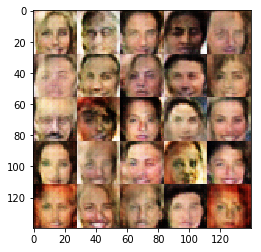

Epoch 1/1; Discriminator Loss: 1.3959; Generator Loss: 0.5639
Epoch 1/1; Discriminator Loss: 0.9995; Generator Loss: 1.0912
Epoch 1/1; Discriminator Loss: 1.0533; Generator Loss: 1.0010
Epoch 1/1; Discriminator Loss: 1.6939; Generator Loss: 2.6678
Epoch 1/1; Discriminator Loss: 1.2400; Generator Loss: 0.8033
Epoch 1/1; Discriminator Loss: 1.0591; Generator Loss: 1.0565
Epoch 1/1; Discriminator Loss: 1.1103; Generator Loss: 0.8857
Epoch 1/1; Discriminator Loss: 1.1785; Generator Loss: 0.7831
Epoch 1/1; Discriminator Loss: 1.0437; Generator Loss: 1.1148
Epoch 1/1; Discriminator Loss: 1.0228; Generator Loss: 1.0502


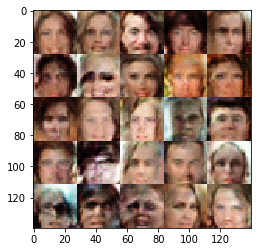

Epoch 1/1; Discriminator Loss: 1.1482; Generator Loss: 1.1311
Epoch 1/1; Discriminator Loss: 1.0052; Generator Loss: 1.2517
Epoch 1/1; Discriminator Loss: 1.3934; Generator Loss: 0.5365
Epoch 1/1; Discriminator Loss: 1.0594; Generator Loss: 1.0572
Epoch 1/1; Discriminator Loss: 1.1341; Generator Loss: 0.8170
Epoch 1/1; Discriminator Loss: 0.9152; Generator Loss: 1.3518
Epoch 1/1; Discriminator Loss: 1.1688; Generator Loss: 1.9893
Epoch 1/1; Discriminator Loss: 1.0982; Generator Loss: 1.1819
Epoch 1/1; Discriminator Loss: 1.0847; Generator Loss: 1.3516
Epoch 1/1; Discriminator Loss: 1.5104; Generator Loss: 0.5098


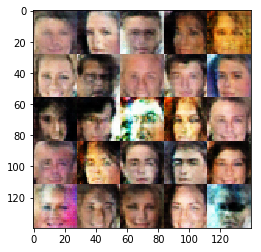

Epoch 1/1; Discriminator Loss: 1.0277; Generator Loss: 1.0620
Epoch 1/1; Discriminator Loss: 1.0245; Generator Loss: 1.0043
Epoch 1/1; Discriminator Loss: 1.2456; Generator Loss: 0.6925
Epoch 1/1; Discriminator Loss: 1.1145; Generator Loss: 1.0263
Epoch 1/1; Discriminator Loss: 0.9328; Generator Loss: 1.3181
Epoch 1/1; Discriminator Loss: 1.1740; Generator Loss: 0.8252
Epoch 1/1; Discriminator Loss: 1.1976; Generator Loss: 2.1667
Epoch 1/1; Discriminator Loss: 1.5085; Generator Loss: 0.4873
Epoch 1/1; Discriminator Loss: 1.1701; Generator Loss: 1.6472
Epoch 1/1; Discriminator Loss: 1.1808; Generator Loss: 1.1037


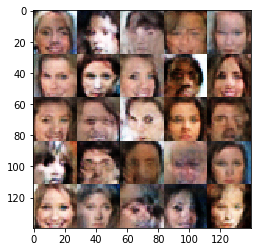

Epoch 1/1; Discriminator Loss: 1.2500; Generator Loss: 0.7177
Epoch 1/1; Discriminator Loss: 1.1959; Generator Loss: 1.9866
Epoch 1/1; Discriminator Loss: 1.6495; Generator Loss: 0.4123
Epoch 1/1; Discriminator Loss: 1.2210; Generator Loss: 1.4840
Epoch 1/1; Discriminator Loss: 1.3511; Generator Loss: 0.5419
Epoch 1/1; Discriminator Loss: 1.0282; Generator Loss: 0.9017
Epoch 1/1; Discriminator Loss: 0.9695; Generator Loss: 1.6531
Epoch 1/1; Discriminator Loss: 1.4192; Generator Loss: 0.5347
Epoch 1/1; Discriminator Loss: 1.1271; Generator Loss: 1.0834
Epoch 1/1; Discriminator Loss: 1.5329; Generator Loss: 0.4328


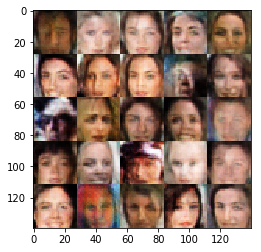

Epoch 1/1; Discriminator Loss: 1.2033; Generator Loss: 1.5320
Epoch 1/1; Discriminator Loss: 1.0800; Generator Loss: 0.9953
Epoch 1/1; Discriminator Loss: 1.0960; Generator Loss: 1.1163
Epoch 1/1; Discriminator Loss: 1.0910; Generator Loss: 0.8893
Epoch 1/1; Discriminator Loss: 1.0588; Generator Loss: 1.5594
Epoch 1/1; Discriminator Loss: 1.0457; Generator Loss: 1.0752
Epoch 1/1; Discriminator Loss: 1.3563; Generator Loss: 0.5472
Epoch 1/1; Discriminator Loss: 1.1079; Generator Loss: 1.1554
Epoch 1/1; Discriminator Loss: 1.3025; Generator Loss: 1.9617
Epoch 1/1; Discriminator Loss: 1.1803; Generator Loss: 0.6978


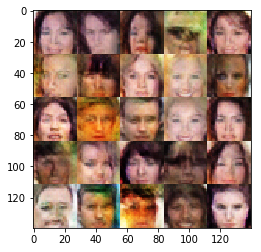

Epoch 1/1; Discriminator Loss: 1.5734; Generator Loss: 0.4162
Epoch 1/1; Discriminator Loss: 1.1175; Generator Loss: 0.8100
Epoch 1/1; Discriminator Loss: 1.0710; Generator Loss: 0.9190
Epoch 1/1; Discriminator Loss: 0.9803; Generator Loss: 1.6770
Epoch 1/1; Discriminator Loss: 1.1585; Generator Loss: 0.8374
Epoch 1/1; Discriminator Loss: 1.2517; Generator Loss: 0.6811


In [22]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.